<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignment 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [255]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import boston_housing

In [256]:
# Load data

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

##### Let's have a look at the shape of the data

In [257]:
x_train.shape, x_test.shape

((404, 13), (102, 13))

In [258]:
x_train[0], x_test[0]

(array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
         91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
         18.72   ]),
 array([ 18.0846,   0.    ,  18.1   ,   0.    ,   0.679 ,   6.434 ,
        100.    ,   1.8347,  24.    , 666.    ,  20.2   ,  27.25  ,
         29.05  ]))

In [260]:
y_train[0], y_test[0]

(15.2, 7.2)

Label number: 15.2


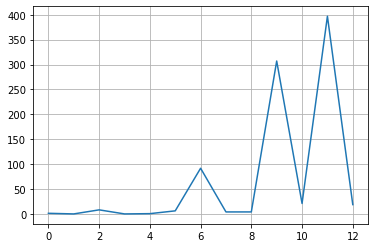

In [261]:
print('Label number:', y_train[0])
plt.grid(True)
plt.plot(x_train[0]);

##### Normalize the data (all features should have roughly the same scale)

In [262]:
from sklearn.preprocessing import StandardScaler

In [263]:
scaler = StandardScaler()

In [264]:
# FIRST fit scaler on the x_train dataset
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [265]:
# transform to scale both datasets
X_train_scaled = scaler.transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [266]:
print('Scaled train set:', X_train_scaled[0])

Scaled train set: [-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]


##### Import the type of model and layers that you will need from Keras.

In [267]:
# Importing the required Keras modules containing model and layers

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Activation, Flatten, MaxPooling2D

# from keras import models, layers

##### Instantiate a model object and use model.add() to add layers to your model

In [268]:
# Creating a Sequential Model and adding the layers

model = Sequential()
# Use activation functions that are appropriate for this task
# model.add(Dense(128, activation=tf.nn.sigmoid, input_shape=(x_train.shape[1],))),
model.add(Dense(64, activation=tf.nn.relu, input_shape=(x_train.shape[1],))),
# model.add(Dropout(0.2)),
model.add(Dense(8, activation='relu')),
# model.add(Dropout(0.2)),
model.add(Dense(16, activation='relu')),
# Since this is a regression model you will have a single output node in the final layer.
# model.add(Dense(1,activation=tf.nn.softmax))
model.add(Dense(1))

##### Compile your model

In [269]:
model.compile(loss='mae', optimizer='rmsprop', metrics=['mse'])

##### Fit your model and report its accuracy in terms of Mean Squared Error

In [270]:
results = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100)
results

Train on 323 samples, validate on 81 samples
Epoch 1/100
323/323 [==============================] - 0s 449us/step - loss: 22.1254 - mse: 573.9427 - val_loss: 23.6172 - val_mse: 642.5397
Epoch 2/100
323/323 [==============================] - 0s 91us/step - loss: 22.0167 - mse: 569.0096 - val_loss: 23.5547 - val_mse: 639.5918
Epoch 3/100
323/323 [==============================] - 0s 105us/step - loss: 21.9424 - mse: 565.8532 - val_loss: 23.4395 - val_mse: 634.3221
Epoch 4/100
323/323 [==============================] - 0s 62us/step - loss: 21.7900 - mse: 559.1740 - val_loss: 23.2302 - val_mse: 624.7272
Epoch 5/100
323/323 [==============================] - 0s 98us/step - loss: 21.5324 - mse: 547.9320 - val_loss: 22.9060 - val_mse: 609.7997
Epoch 6/100
323/323 [==============================] - 0s 58us/step - loss: 21.1605 - mse: 531.6974 - val_loss: 22.4874 - val_mse: 590.9434
Epoch 7/100
323/323 [==============================] - 0s 89us/step - loss: 20.6994 - mse: 511.9818 - val_loss: 2

Epoch 60/100
323/323 [==============================] - 0s 87us/step - loss: 2.2063 - mse: 14.7069 - val_loss: 2.9904 - val_mse: 18.0527
Epoch 61/100
323/323 [==============================] - 0s 67us/step - loss: 2.2084 - mse: 14.3906 - val_loss: 2.8971 - val_mse: 18.8237
Epoch 62/100
323/323 [==============================] - 0s 64us/step - loss: 2.2055 - mse: 14.6776 - val_loss: 2.8237 - val_mse: 17.7213
Epoch 63/100
323/323 [==============================] - 0s 80us/step - loss: 2.1579 - mse: 14.2974 - val_loss: 2.6334 - val_mse: 15.5942
Epoch 64/100
323/323 [==============================] - 0s 64us/step - loss: 2.1617 - mse: 14.0618 - val_loss: 2.6332 - val_mse: 15.7572
Epoch 65/100
323/323 [==============================] - 0s 75us/step - loss: 2.1380 - mse: 13.6759 - val_loss: 2.8343 - val_mse: 16.6560
Epoch 66/100
323/323 [==============================] - 0s 67us/step - loss: 2.1305 - mse: 13.7662 - val_loss: 2.6642 - val_mse: 15.2858
Epoch 67/100
323/323 [===================

##### Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch.

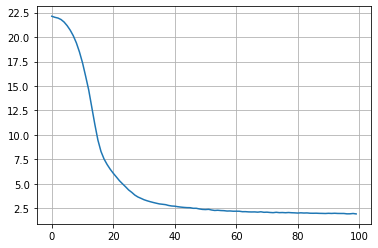

In [271]:
plt.grid(True)
plt.plot(results.history['loss']);

In [289]:
scores = model.evaluate(X_test_scaled, y_test)
scores

102/102 [==============================] - 0s 78us/step


[2.5884643909977934, 14.898442268371582]

In [291]:
# print("\n")
print("Validation Data Metrics:")
print(f"{model.metrics_names[0]}: {scores[0]}")
print(f"{model.metrics_names[1]}: {scores[1]*100}")

Validation Data Metrics:
loss: 2.5884643909977934
mse: 1489.8442268371582


In [288]:
pred = model.predict(X_train_scaled[40:45])
print('Prediction of the selected 5 rows:\n', pred)
print('Actual values of the selected 5 rows:\n', y_train[40:45])

Prediction of the selected 5 rows:
 [[18.267889]
 [25.172928]
 [22.410538]
 [16.532534]
 [15.651946]]
Actual values of the selected 5 rows:
 [15.2 24.7 22.2 16.7 12.7]


##### Run this same data through a linear regression model. Which achieves higher accuracy?

In [273]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [274]:
lr = LinearRegression()

In [275]:
# Fit the Linear model
lr.fit(X_train_scaled,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [276]:
# Predict train set
y_pred = lr.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
print(f'Train msError: {mse:.2f}')

# Apply the Linear model to test data
y_pred = lr.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f'Test msError: {mse:.2f}')

Train msError: 22.00
Test msError: 23.20


##### Sequential model got a higher accurancy VS Linear Regression

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- The number of nodes in your output layer should equal the number of classes you want to predict for Fashion-MNIST.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

### Load data

In [1]:
import keras
from keras.datasets import fashion_mnist 
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

### Data Preprocessing

##### When using a convolutional layer as the first layer to our model, we need to reshape our data to (n_images, x_shape, y_shape, channels). All you really need to know is that you should set channels to 1 for grayscale images and set channels to 3 when you have a set of RGB-images as input.

In [3]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)

##### Negative one is the same as specifying the total number of images in the training set.

In [4]:
train_X.shape

(60000, 28, 28, 1)

##### Modifying the values of each pixel such that they range from 0 to 1 will improve the rate at which our model learns.

In [5]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')

train_X = train_X / 255
test_X = test_X / 255

##### Our model cannot work with categorical data directly. Ergo we must use one hot encoding. In one hot encoding, the digits 0 through 9 are represented as a set of nine zeros and a single one. The digit is determined by the location of the number 1. For example, you’d represent a 3 as [0, 0, 0, 1, 0, 0, 0, 0, 0, 0].

In [6]:
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

### Training

##### Our convolutional layers will have 64 neurons (feature maps) and a 3x3 feature detector. In turn, our pooling layers will use max pooling with a 2x2 matrix. Convolutional neural networks are almost always proceeded by an artificial neural network. In Keras, a Dense layer implements the operation output = activation(dot(input, weight) + bias). The input to our artificial neural network must be in one dimension therefore we flatten it beforehand.

In [7]:
# model Architecture

model = Sequential()

model.add(Conv2D(64, (3,3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Dense(10))

model.add(Activation('softmax'))

In [8]:
# model compile

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_2 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)             

##### The batch size must match the number of images going into our first convolutional layer.

In [11]:
model.fit(train_X, train_Y_one_hot, batch_size=64, epochs=10, validation_data=(test_X, test_Y_one_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 52s 861us/step - loss: 0.4659 - accuracy: 0.8337 - val_loss: 0.3733 - val_accuracy: 0.8636
Epoch 2/10
60000/60000 [==============================] - 55s 921us/step - loss: 0.3133 - accuracy: 0.8867 - val_loss: 0.3335 - val_accuracy: 0.8770
Epoch 3/10
60000/60000 [==============================] - 60s 1ms/step - loss: 0.2753 - accuracy: 0.8998 - val_loss: 0.3041 - val_accuracy: 0.8889
Epoch 4/10
60000/60000 [==============================] - 54s 899us/step - loss: 0.2477 - accuracy: 0.9107 - val_loss: 0.2798 - val_accuracy: 0.8969
Epoch 5/10
60000/60000 [==============================] - 54s 905us/step - loss: 0.2274 - accuracy: 0.9168 - val_loss: 0.2696 - val_accuracy: 0.9028
Epoch 6/10
60000/60000 [==============================] - 53s 880us/step - loss: 0.2129 - accuracy: 0.9231 - val_loss: 0.2670 - val_accuracy: 0.9057
Epoch 7/10
60000/60000 [==============================] - 

In [12]:
test_loss, test_acc = model.evaluate(test_X, test_Y_one_hot)
print('Test loss', test_loss)
print('Test accuracy', test_acc)

10000/10000 [==============================] - 2s 197us/step
Test loss 0.27921232336759566
Test accuracy 0.9018999934196472


In [13]:
predictions = model.predict(test_X)
print(np.argmax(np.round(predictions[0])))

9


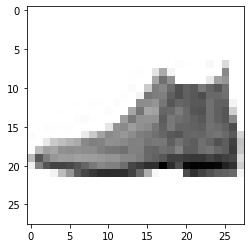

In [14]:
plt.imshow(test_X[0].reshape(28, 28), cmap = plt.cm.binary)
plt.show()

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.